Following ideas presented in https://www.scipost.org/SciPostPhys.4.5.026?acad_field_slug=politicalscience

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
%matplotlib widget
from _common import *
import scipy
import matplotlib as mpl
mpl.rcParams.update({'font.size': 20})
import systems

/Users/krishnanganesh/anaconda3/lib/python3.8/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


Let's first use their function ``extract_kwant_matrices`` which should give us the $H_{sr}$ , $H$ , $V$ and $P_{Sr}$ matrices we need to construct the bound state problem.

In [2]:
from dataclasses import dataclass

@dataclass
class parameters:
    L : float
    W : float
    a : float
    t : float
    mu: float
    Delta: float
    phi: float
    energy : float
    V_n : float
    alpha : float
    Zee : float
    
    A: float
    B: float
    C: float
    flux: float




In [3]:
# # First let's make a really simple Kwant system:
# def make_junction_2D(params):
#     syst = kwant.Builder(particle_hole= sx)
#     lat = kwant.lattice.square(a = params.a , norbs =2 )

#     for i in range(params.L // params.a):
#         for j in range(params.W // params.a):
#             syst[lat(i , j)] = (4*params.t/(params.a**2) - params.mu + params.V_n)*np.array([[1, 0] ,[0 , -1]]) 
#             if i>0:
#                 syst[lat(i , j) , lat(i-1 , j)] = -params.t/(params.a**2)*np.array([[1, 0] ,[0 , -1]]) 
#             if j > 0:
#                 syst[lat(i , j) , lat(i , j-1)] = -params.t/(params.a**2)*np.array([[1, 0] ,[0 , -1]]) 
            
#     lead_L = kwant.Builder(kwant.TranslationalSymmetry((-params.a , 0)) , particle_hole= sx)
#     for i in range(params.W // params.a):
#         lead_L[lat(0 , i)] = ( (4*params.t/(params.a**2) - params.mu)*np.array([[1, 0] ,[0 , -1]]) 
#                                + params.Delta*np.exp(1j*params.phi)*np.array([[0 , 1],[0 , 0]])
#                                + params.Delta*np.exp(-1j*params.phi)*np.array([[0 , 0],[1 , 0]]))
#         if i > 0:
#             lead_L[lat(0 , i) , lat(0 , i-1)] = -params.t/(params.a**2)*np.array([[1, 0] ,[0 , -1]]) 
#         lead_L[lat(1 ,i) , lat(0 , i)] = -params.t/(params.a**2)*np.array([[1, 0] ,[0 , -1]]) 

#     lead_R = kwant.Builder(kwant.TranslationalSymmetry((params.a , 0)) , particle_hole= sx)
#     for i in range(params.W // params.a):
#         lead_R[lat(0 , i)] = ( (4*params.t/(params.a**2) - params.mu)*np.array([[1, 0] ,[0 , -1]]) 
#                                + params.Delta*np.array([[0 , 1],[1 , 0]]))
#         if i > 0:
#             lead_R[lat(0 , i) , lat(0 , i-1)] = -params.t/(params.a**2)*np.array([[1, 0] ,[0 , -1]]) 
#         lead_R[lat(1 ,i) , lat(0 , i)] = -params.t/(params.a**2)*np.array([[1, 0] ,[0 , -1]]) 

#     syst.attach_lead(lead_L)
#     syst.attach_lead(lead_R)

#     syst = syst.finalized()
#     return syst    

In [4]:
# def make_topological_nanowire(params):

#     tau_plus = np.kron(np.array([[0 , 1],[0 , 0]]) , I)    
#     tau_minus = tau_plus.T
#     syst = kwant.Builder()
#     lat = kwant.lattice.square(a = params.a , norbs = 4)
#     # The normal region is a single lattice site with no pair potential
#     syst[lat(0 , 0)] = (-params.mu + 2*params.t + params.V_n)*np.kron(sz , I) + params.B*np.kron(I , sz)
#     # syst[lat(1 , 0)] = (-params.mu + 2*params.t + params.V_n)*np.kron(sz , I) + params.B*np.kron(I , sz)
#     # syst[lat(1 , 0) , lat( 0 , 0)] = -params.t*np.kron(sz , I) + 1j*params.alpha*np.kron(sz , sx)
#     leadL = kwant.Builder(kwant.TranslationalSymmetry((-params.a , 0)))
#     leadL[lat(0 , 0)] = ((-params.mu + 2*params.t)*np.kron(sz , I) + params.B*np.kron(I , sz) 
#                         + params.Delta*np.exp(1j*params.phi)*tau_plus + params.Delta*np.exp(-1j*params.phi)*tau_minus)
#     leadL[lat(1 , 0) , lat(0 , 0)] = -params.t*np.kron(sz , I) + 1j*params.alpha*np.kron(sz , sx)

#     leadR = kwant.Builder(kwant.TranslationalSymmetry((params.a , 0)))
#     leadR[lat(0 , 0)] = ((-params.mu + 2*params.t)*np.kron(sz , I) + params.B*np.kron(I , sz) 
#                         + params.Delta*np.kron(sx , I))
#     leadR[lat(1 , 0) , lat(0 , 0)] = -params.t*np.kron(sz , I) + 1j*params.alpha*np.kron(sz , sx)

#     syst.attach_lead(leadL)
#     syst.attach_lead(leadR)

#     syst = syst.finalized()

#     return syst



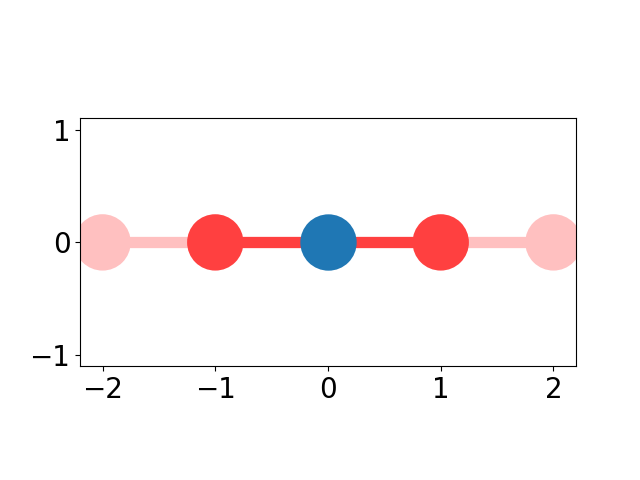

In [5]:
params = parameters(L = 2, W = 10 , a = 1, t =1 , mu = 0.5 , Delta= 0.5 , phi = 0 , energy = 0 , V_n= 1.25 , alpha = 0.5 , Zee = 1 , A = 0 , B = 0 , C = 0 , flux = 0)
syst = systems.topological_junction_rashba(params)
kwant.plot(syst);

In [6]:
# extract_kwant_matrices?
H_s , H_leads , V_leads , transf  = extract_kwant_matrices(syst)
print(H_s.shape)
for i in range(len(H_leads)):
    print(H_leads[i].shape)
for i in range(len(V_leads)):
    print(V_leads[i].shape)
print(transf.shape)

N_t = H_leads[0].shape[0]

print('N_t = ' , N_t)

(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(8, 4)
N_t =  4


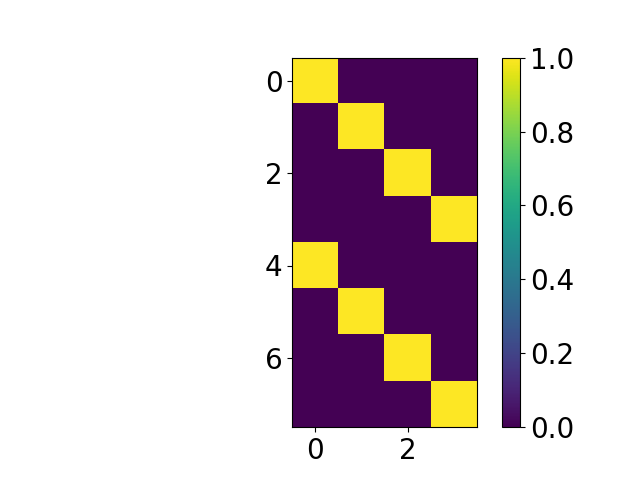

In [7]:
plt.figure()
plt.imshow(np.abs(transf))
plt.colorbar() 

In [8]:
L_out , X_out = leads_modes(H_leads , V_leads , params.energy)

def truncate(L_out , X_out , tolerance = 1e-6):
    """
    Finds zero eigenvalues (within some tolerance set by 'tolerance') of L_out and removes them alond with their corresponding columns in X_out.
    """
    eigenvalues = np.diag(L_out)
    # Array of indices where eigenvalues are less than tolerance:
    indices = np.where((eigenvalues <= tolerance))

    # Creating truncated eigenvalue matrix:
    eigenvalues_truncated = np.delete(eigenvalues , indices)
    Lambda_e_tilde = np.diag(eigenvalues_truncated)

    # Truncating corresponding columns of the eigenvector matrix:
    eigenvectors = X_out
    Phi_e_tilde = np.delete(eigenvectors , indices , axis = 1)

    return  Lambda_e_tilde , Phi_e_tilde

# Truncating zero eigenvalues:
Lambdas = []
Phis = []
for L , X in zip(L_out , X_out):
    Lambda_e_tilde , Phi_e_tilde  = truncate(L , X)
    Lambdas.append(Lambda_e_tilde)
    Phis.append(Phi_e_tilde)

True

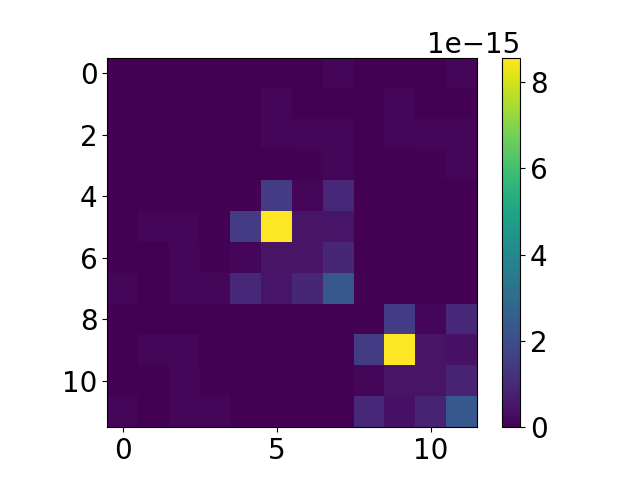

In [9]:
Lambda = scipy.linalg.block_diag(*Lambdas)
Phi = scipy.linalg.block_diag(*Phis)
V = scipy.linalg.block_diag(*V_leads)
# Constructing H_eff:
H_eff_00 = H_s - params.energy*np.identity(H_s.shape[0])
H_eff_01 = transf.T@np.conjugate(V.T)@Phi@Lambda
H_eff_10 = Lambda.conj()@(Phi.T).conj()@V@transf
H_eff_11 = -Lambda.conj()@(Phi.T).conj()@V@Phi
H_eff = np.block([[H_eff_00 , H_eff_01],[H_eff_10 , H_eff_11]])

# Hermiticity checks:

plt.figure()

plt.imshow(np.abs(H_eff - (H_eff.T).conj()))
plt.colorbar()


# Matrix Shape tests:
H_eff_dim = H_eff.shape
N_sr = H_s.shape[0]
N_e = Lambda.shape[0]

(N_sr + N_e) == H_eff_dim[0]

In [10]:
# Computing lowest eigenvalues of H_eff using lanczos.
evals , evecs = scipy.sparse.linalg.eigsh(H_eff , k = 3 , sigma = 0)
print(evals)

[ 3.45639572e-16  4.59192775e-16 -1.10337389e+00]


100%|██████████| 201/201 [00:01<00:00, 131.27it/s]


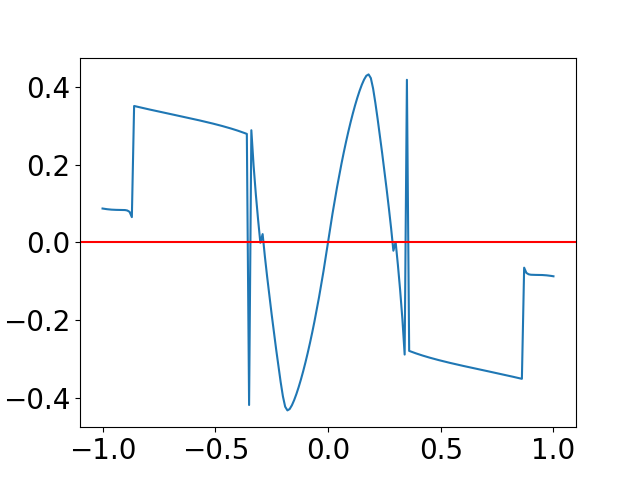

In [11]:
# Implementing pseudocode in notes:
def calculate_H_eff(params):
    syst = systems.topological_junction_rashba(params)
    H_s , H_leads , V_leads , transf  = extract_kwant_matrices(syst)
    L_out , X_out = leads_modes(H_leads , V_leads , params.energy)
    # Truncating zero eigenvalues:
    Lambdas = []
    Phis = []
    for L , X in zip(L_out , X_out):
        Lambda_e_tilde , Phi_e_tilde  = truncate(L , X)
        Lambdas.append(Lambda_e_tilde)
        Phis.append(Phi_e_tilde)
    
    Lambda = scipy.linalg.block_diag(*Lambdas)
    Phi = scipy.linalg.block_diag(*Phis)
    V = scipy.linalg.block_diag(*V_leads)
    # Constructing H_eff:
    H_eff_00 = H_s - params.energy*np.identity(H_s.shape[0])
    H_eff_01 = transf.T@np.conjugate(V.T)@Phi@Lambda
    H_eff_10 = Lambda.conj()@(Phi.T).conj()@V@transf
    H_eff_11 = -Lambda.conj()@(Phi.T).conj()@V@Phi
    H_eff = np.block([[H_eff_00 , H_eff_01],[H_eff_10 , H_eff_11]])
    
    return H_eff

from tqdm import tqdm

energies = np.linspace(-1 , 1 , int(2e2 + 1))
evals = np.zeros_like(energies)
evecs = []
effective_hamiltonians = []
for i in tqdm(range(len(energies))):
    p = parameters(L = 2, W = 10 , a = 1, t =1 , mu = 0.5 , Delta= 0.5 , phi = 0 , energy = energies[i] , V_n= 1.25 , alpha = 0.5 , Zee = 1 , A = 0 , B = 0 , C = 0 , flux = 0)
    H_effective = calculate_H_eff(p)
    energy , psi = scipy.sparse.linalg.eigsh(H_effective , k = 1 , sigma = 0)
    evals[i] = energy
    evecs.append(psi)
    effective_hamiltonians.append(H_effective)

plt.figure()
plt.plot(energies , evals)
plt.axhline(y =  0, color = 'r')

In [12]:
# Let us compare this to their "finder" function:
from bound_state_finders import *
params = parameters(L = 1, W = 3 , a = 1, t =1 , mu = 0.0 , Delta= 0.05 , phi = 0 , energy = 0 , V_n= 0 , alpha = 0 , Zee = 0 , A = 0 , B = 0 , C = 0 , flux = 0)
e_range = (-1 , 1) # <- their 'finder' takes in a tuple of the maximum and minimum values in the energy range
bound_state_energy = finder(systems.normal_junction(params), e_range)
print(bound_state_energy)

0.5879138200054264


In [37]:
phi_values = np.linspace(0 , 2 , int(4e2 + 1))
bsenergies = np.zeros_like(phi_values)
for i in tqdm(range(len(phi_values))):
    params = parameters(L = 1, W = 1 , a = 1, t = 1 , mu = 0.5 , Delta= 0.5 , phi = 2*np.pi*phi_values[i], energy = 0 , V_n= 1.25 , alpha = 0.5 , Zee = 1 , A = 1 , B = 0.0 , C = 0 , flux = 0)
    e_range = (-1 , 1) # <- their 'finder' takes in a tuple of the maximum and minimum values in the energy range
    bsenergies[i] = finder(systems.topological_junction_rashba(params), e_range)
    if np.isnan(bsenergies[i]):
        print("Energy range sampled yields no bound state solutions.")
        break


100%|██████████| 401/401 [00:18<00:00, 21.76it/s]


In [38]:
print(bsenergies)
import math
np.isnan(bsenergies[0])

[-0.2864658481483292 -0.2864240891741358 -0.2862983434914934
 -0.2860887180830251 -0.2857945649936529 -0.2854160317502363
 -0.2849514787077634 -0.2844011806876259  0.2837650415468245
 -0.2830422411738969 -0.282233372585468  -0.2813385091630883
 -0.2803579182641539 -0.2792922079675989 -0.2781424852044863
 -0.2769091706054366 -0.2755940675018309 -0.2741980431341735
 -0.2727218305970049 -0.2711676610980124 -0.2695365157632155
 -0.267829746078262  -0.2660494209651274 -0.264196763489712
 -0.2622730696524203 -0.2602801752673259 -0.2582193692051912
 -0.256092543599653  -0.2539009598216156 -0.2516460357797662
 -0.2493293759305945 -0.2469524117080938 -0.2445168262776898
 -0.2420238600045995 -0.2394751012541822 -0.2368713970062041
  0.2342146893125107  0.2315058033371171  0.2287464904577362
  0.2259377348920846  0.2230810188132404  0.2201771912178761
  0.2172280687403579  0.2142342618700714  0.2111969766425807
  0.2081177549156847  0.2049974506915425  0.2018370193193981
  0.1986380211282484 -0.1

False

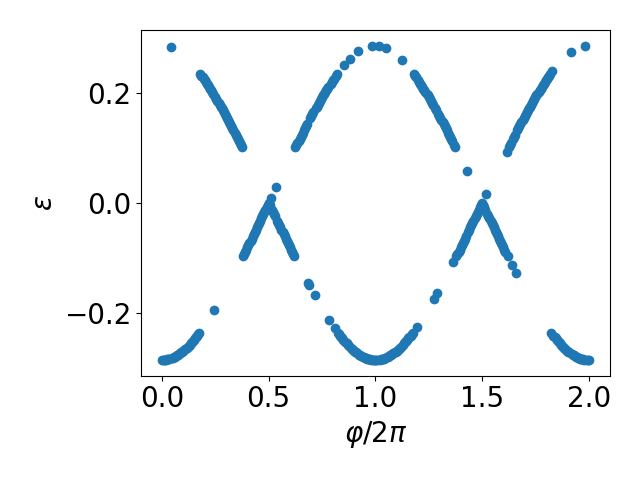

In [39]:
plt.figure()
plt.scatter(phi_values , bsenergies)
plt.xlabel(r'$\varphi/2\pi$')
plt.ylabel(r'$\varepsilon$')
plt.tight_layout()